# Data ingestion

#### Importing important libraries

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact


In [2]:
# Specify the absolute file path
file_path = "dataset/air_quality_data.csv"

In [3]:
# importing dataset and converting data into pandas dataframe
df = pd.read_csv(file_path)

# About dataset

<b>Context</b>
Air Quality plays a significant factor in maintaining the health of an individual. Hence, monitoring the Air Quality by measuring and documenting the concentration levels of different pollutants is important.

<b>Source</b>
The dataset have been derived from Central Pollution Control Board of India: : https://cpcb.nic.in/

<b>Inspiration</b>
This dataset aims to document the pollutant concentration levels in different cities of India at different dates and time during the period of 2015 - 2020. The pollutant concentration levels can be utilized to determine Air Quality Index and conclude on the air quality of India throughout the period. The dataset is aimed to be updated annually with up-to-date values and credible information.

Dataset Reference: [click Here](https://www.kaggle.com/datasets/amandeepvasistha/air-quality-data)


# Data Profiling and Inspection

# 1. Data Size
Question: How big data?<br>
Approach: check the shape of the dataset.<br>
-- shape returns the number of rows and columns


In [4]:
df.shape

(737406, 16)

# 2. Data Preview
Question: What does the data look like?<br>
-- head() displays the first few roes of the dataset<br>
-- sample() displays the randomly selected items rows of the dataset.



In [5]:
df.head(3)

City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   

      SO2  O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  122.07 NaN      0.0      0.0     0.0  NaN        NaN  
1   85.90 NaN      0.0      0.0     0.0  NaN        NaN  
2   52.83 NaN      0.0      0.0     0.0  NaN        NaN

In [6]:
df.sample(3)

City             Datetime   PM2.5    PM10     NO    NO2  \
706935  Visakhapatnam  2020-05-22 21:00:00    6.00   59.50   1.30  18.10   
288431          Delhi  2019-12-08 12:00:00  306.78  409.36  31.81  75.76   
516091        Lucknow  2019-08-12 06:00:00   37.66     NaN  10.63  21.99   

          NOx    NH3    CO    SO2     O3  Benzene  Toluene  Xylene    AQI  \
706935  10.35  12.32  0.11   7.88  37.17     1.35     2.45    0.75  100.0   
288431  72.87  64.99  1.58  13.25  45.02     7.05    37.99    1.64  412.0   
516091  17.86  11.32  2.17   4.03  16.21     0.48     3.98     NaN   99.0   

          AQI_Bucket  
706935  Satisfactory  
288431        Severe  
516091  Satisfactory

# 3. Data Types
Question: What types of information are stored in each columns?<br>
Approach: Check the data types of each column using dtype or info().<br>
-- info() provides information about the dataset.<br>
-- dtypes returns the data types of each columns


In [7]:
# checking datatypes of each colums
df.dtypes

City           object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [8]:
# Overall Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737406 entries, 0 to 737405
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        737406 non-null  object 
 1   Datetime    737406 non-null  object 
 2   PM2.5       587720 non-null  float64
 3   PM10        429529 non-null  float64
 4   NO          617192 non-null  float64
 5   NO2         616699 non-null  float64
 6   NOx         609997 non-null  float64
 7   NH3         454536 non-null  float64
 8   CO          648830 non-null  float64
 9   SO2         603179 non-null  float64
 10  O3          604176 non-null  float64
 11  Benzene     568137 non-null  float64
 12  Toluene     508758 non-null  float64
 13  Xylene      263468 non-null  float64
 14  AQI         603645 non-null  float64
 15  AQI_Bucket  603645 non-null  object 
dtypes: float64(13), object(3)
memory usage: 90.0+ MB


### From above information
* Total number of entries have 737406
* Total number of columns is 16
    1. PM2.5 has 587720 non null remaining are null value  
    2. PM10 has 429529 non null reamaining are null value
    3. NO has 617192 non null reamaining are null value
    4. NO2 has 616699 non null reamaining are null value
    5. NOx has 609997 non null reamaining are null value
    6. NH3 has 454536 non null reamaining are null value
    7. CO has 648830 non null reamaining are null value
    8. SO2 has 603179 non null reamaining are null value
    9. Benzene has 568137 non null reamaining are null value
    10. Toluene has 508758 non null reamaining are null value
    11. Xylene has 263468  non null reamaining are null value
    12. AQI has 603645  non null reamaining are null value
    13. AQI_Bucket has 603645  non null reamaining are null value
    



# 4. Missing Values
Question: Are there any null or missing values in the data?<br>
Approach: Check for the presence of missing values using isnull() or isna().<br>
-- isna().sum() or isnull().sum() gives the total number of missing values per column.<br>
-- isna().mean() * 100 provides the percentage of missing values



In [9]:
# Checking missing data 
df.isna().sum()

City               0
Datetime           0
PM2.5         149686
PM10          307877
NO            120214
NO2           120707
NOx           127409
NH3           282870
CO             88576
SO2           134227
O3            133230
Benzene       169269
Toluene       228648
Xylene        473938
AQI           133761
AQI_Bucket    133761
dtype: int64

In [10]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


### From above observation
* Xylene has highest percentage of missing value with 64.27% in original dataset
* CO has lowest percentage of missing value among others with 12.27% in original dataset 

# 5. Statistical Overview
Question: How is the data distributed statistically?<br>
Approach: Check statistical measures using describe()<br>
-- describe() gives statistical measures for numerical columns.



In [11]:
# Descritive statistice
df.describe().transpose()

count        mean         std   min    25%     50%     75%  \
PM2.5    587720.0   67.615679   74.331004  0.01  26.29   46.50   79.50   
PM10     429529.0  119.035184  103.678358  0.01  52.54   91.71  147.65   
NO       617192.0   17.428187   31.758813  0.01   3.90    8.04   16.33   
NO2      616699.0   28.871505   28.980321  0.01  10.85   20.38   36.42   
NOx      609997.0   32.288461   39.452857  0.00  10.73   20.90   37.28   
NH3      454536.0   23.602700   28.705890  0.01   8.14   15.39   29.27   
CO       648830.0    2.186294   10.830938  0.00   0.42    0.81    1.37   
SO2      603179.0   14.059323   19.257355  0.01   4.91    8.40   14.80   
O3       604176.0   34.785994   29.509072  0.01  13.65   26.48   47.50   
Benzene  568137.0    3.095727   16.429980  0.00   0.06    0.87    2.77   
Toluene  508758.0    8.662618   21.669094  0.00   0.37    2.61    8.44   
Xylene   263468.0    3.127918    7.775396  0.00   0.10    0.80    3.14   
AQI      603645.0  166.415562  161.287129  8.00  79.00  116.00  208.00   

             max  
PM2.5     999.99  
PM10     1000.00  
NO        499.99  
NO2       499.51  
NOx       498.61  
NH3       499.97  
CO        498.57  
SO2       199.96  
O3        497.62  
Benzene   498.07  
Toluene   499.40  
Xylene    499.99  
AQI      3133.00

In [12]:
# Descritive statistice
df.describe(include="object").transpose()

count unique         top    freq
City        737406     26   Ahmedabad   50201
Datetime    737406  50201  2020-07-01      26
AQI_Bucket  603645      6    Moderate  207820

-- Central Tendency: This term refers to values located at the data's central position or middle zone.<br>
The three generally estimated parameters of central tendency are mean, median, and mode.<br>
-- Mean is the average of all values in data.<br>
-- While the mode is the values that occurs the maximum number of times.<br>
-- The Medain is the middle value with equal observations to its left and right.



### From above observation
* AQI has highest mean with maximum value 3133 and minimum value 8. 
* CO has lowest mean with maximum value 498.57 and minimum value 0.
* PM10 has 119.03 mean with maximum value 1000 and minimum value 0.01.
* PM2.5 has 67.61 mean with maximum value 999.99 and minimum vale 0.01. 
* Moderate has highest frequency with 207820 in AQI_Bucket column <br>
So on


# 6. Data Skewness
Question: How is the data distributed are skewed?<br>
Approach: Check skewness of data using skew().<br>
-- skew() return skew value pf numerical features.

In [13]:
numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

In [14]:
# checking the skew of numerical features
df[numerical_features].skew()

PM2.5       4.283556
PM10        2.498362
NO          5.383978
NO2         3.326041
NOx         3.672102
NH3         5.212583
CO         20.851482
SO2         4.424654
O3          1.694459
Benzene    22.468028
Toluene    11.504695
Xylene     13.586556
AQI         6.305913
dtype: float64

# From above observation
* All the columns has positively skewed distribution that means mean is greater than medain in each columns

# 7. Duplicated Data
Question: Are there duplicate value?<br>
Approach: Identify duplicate using duplicated().<br>
-- duplicated().sum() counts the number of duplicate rows.

In [15]:
# checking duplicated value
df.duplicated().sum()

0

# From above observation
* There is no any duplicated value in this dataset.

# 8. Correlation Analysis
Question: How are different columns related to each other? <br>
Approach: Examine the correlation matrix and visualize it if needed.<br>
-- cor() calculate the correlation matrix
-- heatmap() visualize the correlation matrix

In [16]:
# calculating the correlation
df.corr(numeric_only=True)

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.810258  0.372490  0.304860  0.387089  0.244341  0.082974   
PM10     0.810258  1.000000  0.441263  0.431134  0.482848  0.344766  0.101421   
NO       0.372490  0.441263  1.000000  0.435492  0.802005  0.170527  0.318198   
NO2      0.304860  0.431134  0.435492  1.000000  0.618809  0.217349  0.271829   
NOx      0.387089  0.482848  0.802005  0.618809  1.000000  0.161921  0.277771   
NH3      0.244341  0.344766  0.170527  0.217349  0.161921  1.000000  0.108077   
CO       0.082974  0.101421  0.318198  0.271829  0.277771  0.108077  1.000000   
SO2      0.125238  0.232386  0.131319  0.307913  0.181156 -0.011395  0.284842   
O3       0.050387  0.117720 -0.103012  0.065800 -0.072262  0.050083 -0.047227   
Benzene  0.033784  0.034877  0.071242  0.050680  0.073887 -0.007835  0.068327   
Toluene  0.128167  0.185583  0.193959  0.273605  0.227904  0.024173  0.244104   
Xylene   0.117414  0.100302  0.152372  0.189917  0.150213 -0.009343  0.171420   
AQI      0.507057  0.673837  0.346359  0.432101  0.389159  0.228341  0.581982   

              SO2        O3   Benzene   Toluene    Xylene       AQI  
PM2.5    0.125238  0.050387  0.033784  0.128167  0.117414  0.507057  
PM10     0.232386  0.117720  0.034877  0.185583  0.100302  0.673837  
NO       0.131319 -0.103012  0.071242  0.193959  0.152372  0.346359  
NO2      0.307913  0.065800  0.050680  0.273605  0.189917  0.432101  
NOx      0.181156 -0.072262  0.073887  0.227904  0.150213  0.389159  
NH3     -0.011395  0.050083 -0.007835  0.024173 -0.009343  0.228341  
CO       0.284842 -0.047227  0.068327  0.244104  0.171420  0.581982  
SO2      1.000000  0.102724  0.029420  0.244753  0.190131  0.386519  
O3       0.102724  1.000000 -0.008716  0.036752 -0.006909  0.095725  
Benzene  0.029420 -0.008716  1.000000  0.753803  0.407166  0.053499  
Toluene  0.244753  0.036752  0.753803  1.000000  0.429239  0.262089  
Xylene   0.190131 -0.006909  0.407166  0.429239  1.000000  0.157253  
AQI      0.386519  0.095725  0.053499  0.262089  0.157253  1.000000

<Axes: >

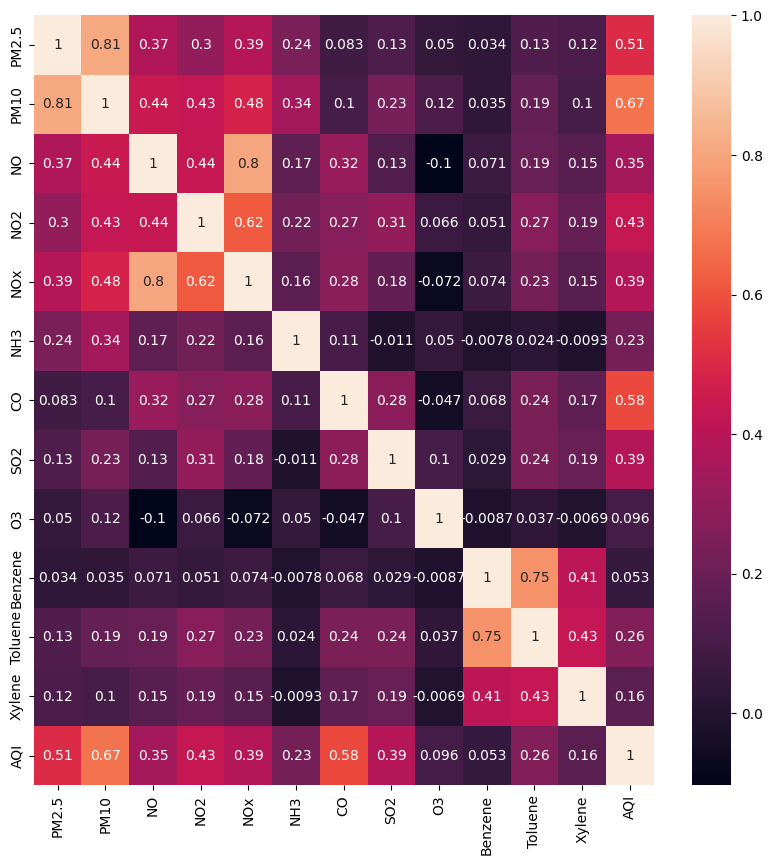

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

### From above correlation matrix
* Most of the columns are positively correlated with each other

# 9. Exploring Diversity
Question: How may unique value are there in a specific column?<br>
Approach: Use nunique() methods to find the number of unique values in a particular column.<br>
-- nunique() method returns the number of unique values for each columns.

In [18]:
#  Checking the unique values in columns AQI_Bucket
df["AQI_Bucket"].nunique()

6

### From above observation
* AQI_Bucket column has total 6 unique values.

# Exploratory Data Analysis (EDA)

# 1. Univariate Analysis
* Its refers to the examination and exploration of a single variable in a dataset.
* It  involves the distribution summary statistic, visualization (eg: histogram, box plot) and understaing the distribution and characteristics of that specific variable

#### AQI_Bucket
Question: Explore the distribution of AQI_Bucket.<br>
Approach: Visualized the distribution of AQI_Bucket (categorical data) using pie().<br>
-- plt.pie() visualized the value counts of single classes in a column.<br>

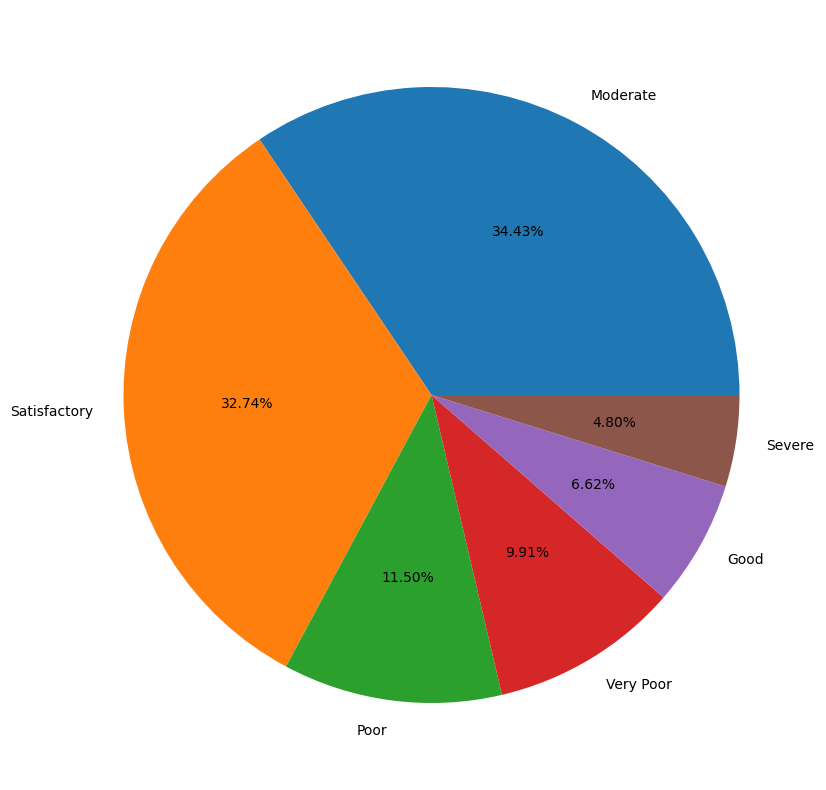

In [19]:
# calculating the value counts
aqi_bucket = df["AQI_Bucket"].value_counts()

# visualizing  in pie chart
plt.figure(figsize=(10,10))
plt.pie(x=aqi_bucket.values, labels=aqi_bucket.index, autopct="%.2f%%")
plt.grid()
plt.show()

### From above observation,
* Moderate has highest counts value with around 34.43% of data in this dataset.
* Satisfactory has counts value with around 32.74% of data in this dataset.
* Severe has lowest counts value with arount 4.80% of data in this dataset.
* Remaining Poor, Very Poor and Good has around 5% to 12% of data in this dataset.

### City
Qustion: Exploring the distribution of City.<br>
Approach: Visualizing the distribution of City(categorical data) using countplot().<br>
-- sns.countplot() compute counts and visualized the counts values of each classes. <br>

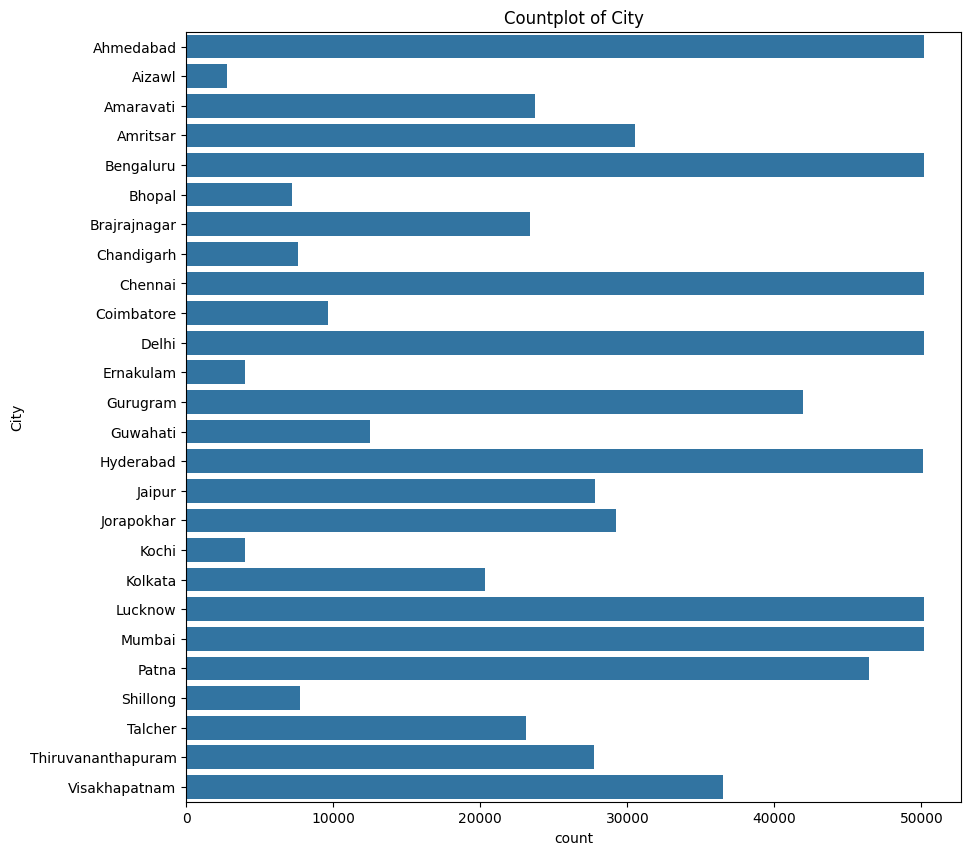

In [20]:
# visualizing in countplot
plt.figure(figsize=(10,10))
plt.title("Countplot of City")
sns.countplot(df["City"])
plt.show()

### From above observation,
* City like Ahmedabad, Delhi, Mumbai, Bangaluru, Lucknow, Chennai, Hydrabad and Patna has highest percentage of data in this dataset
* City like Chadigarh, Bhopal, Kochi, Emakulam and Aizawi has lowest percentage of data in this dataset.

### PM2.5
Question: Exploring the distribuiton of PM2.5.<br>
Approach: Visualizing the distribution of PM2.5 numerical data using displot().<br>
-- sns.displot() visualize the numerical data distribution.<br>

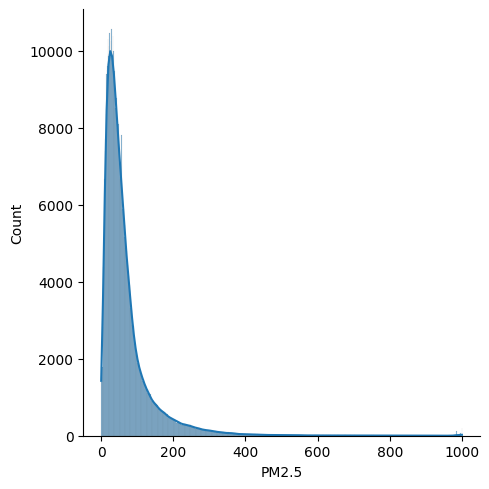

In [21]:
# visualization of PM2.5 using sns.displot()
sns.displot(data=df["PM2.5"], kde=True)
plt.show()

### From above observation
* Distribution of PM2.5 seems to be right tail which means mean is greater tha median 

### NO
Question: Exploring the distribuiton of NO.<br>
Approach: Visualizing the distribution of NO numerical data using displot().<br>
-- sns.displot() visualize the numerical data distribution.<br>


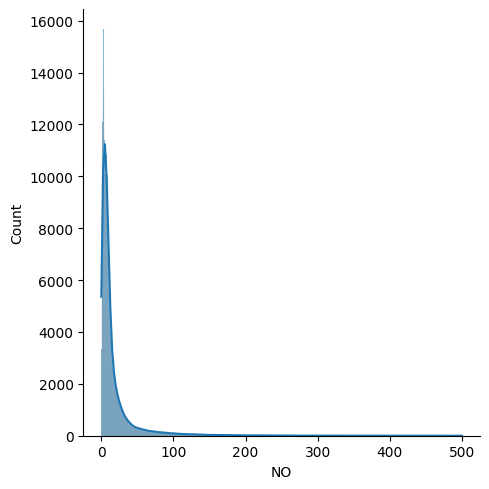

In [22]:
# visualization of PM2.5 using sns.displot()
sns.displot(data=df["NO"], kde=True)
plt.show()

### From above observation
* Distribution of NO seems to be right tail which means mean is greater tha median 

### AQI
Question: Exploring the distribuiton of AQI.<br>
Approach: Visualizing the distribution of AQi numerical data using displot().<br>
-- sns.displot() visualize the numerical data distribution.<br>


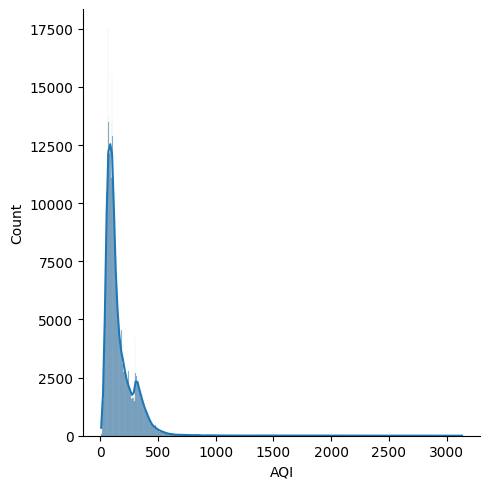

In [23]:
## Display displot for our AQI
sns.displot(data=df["AQI"], kde=True)
plt.show()

### From above observation
* Distribution of AQI seems to be right tail which means mean is greater tha median  

### Spereating numerical and categorical data

In [24]:
numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
categorical_features= ['City','AQI_Bucket']

# Creating an interactive plot for the each features

In [25]:
## numerical data
@interact(predictor=numerical_features)
def interactive_bivariate_barplot(predictor):
    sns.displot(x=predictor,data=df,kde=True,height=6, color="purple")

interactive(children=(Dropdown(description='predictor', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', '…

### Here is the distribution plot of all numerical data

# 2. Bi/Multi-variate Analysis
* Its refers to the examination and exploration of a two or more variable in a dataset.
The main three types we will see here are:
    * Numerical VS Numerical
    * Categorical VS Numerical
    * Categorical VS Categorical

##### Here target variable is <b>AQI</b> for <b>regression</b> and <b>AQI_Bucket</b> for <b>classification.</b>

### Distribution of data with target variable "AQI_Bucket"

### PM2.5 VS PM10 VS AQI_Bucket
Question: What is the distribution of PM2.5 VS PM10 VS AQI_Bucket(numerical Vs categorical)?<br>
Approach: Visualizing the distribution of PM2.5 VS PM10 VS AQI_Bucket using scatterplot().<br>
-- sns.scatterplot() visualize the distribution of data of give variables. <br>

C:\Users\Thinkpad\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


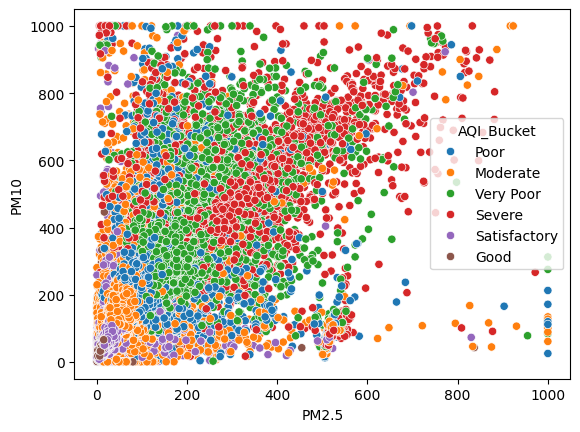

In [26]:
sns.scatterplot(x=df["PM2.5"], y=df["PM10"], hue=df["AQI_Bucket"])
plt.show()

### From above obseravation
* Most of the data are scatter between 0 to 1000 of PM10 and 0 to 800 of PM2.5 with respect to AQI_Bucket.

### NO VS NO2 VS AQI_Bucket
Question: What is the distribution of NO VS NO2 VS AQI_Bucket(numerical Vs categorical)?<br>
Approach: Visualizing the distribution of NO VS NO2 VS AQI_Bucket using scatterplot().<br>
-- sns.scatterplot() visualize the distribution of data of give variables. <br>

C:\Users\Thinkpad\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


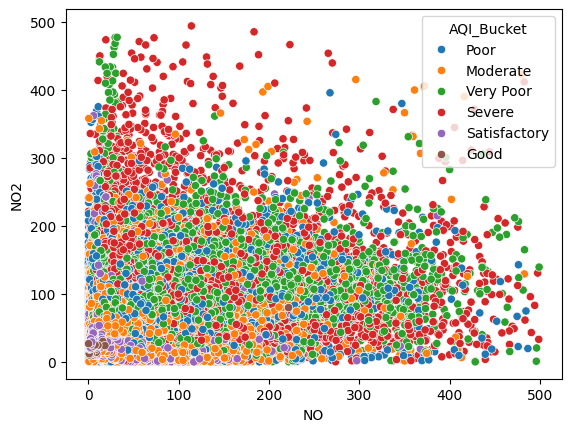

In [27]:
sns.scatterplot(x=df["NO"], y=df["NO2"], hue=df["AQI_Bucket"])
plt.show()

### From above obseravation
* Most of the data are scatter between 0 to 400 of NO2 and  0 to 500 of NO with respect to AQI_Bucket.

### City VS AQI_Bucket
Question: What is the distribution of City VS AQI_Bucket(numerical Vs categorical)?<br>
Approach: Visualizing the distribution of City VS AQI_Bucket using barplot().<br>
-- sns.barplot() visualize the distribution of categorical data. <br>

In [28]:
df.groupby(["City","AQI_Bucket"]).size().unstack()

AQI_Bucket            Good  Moderate     Poor  Satisfactory   Severe  \
City                                                                   
Ahmedabad             76.0    6744.0   6405.0        1310.0  11556.0   
Aizawl              1965.0       NaN      NaN         674.0      NaN   
Amaravati           4385.0    5595.0   1179.0        8865.0      NaN   
Amritsar            2257.0   10794.0   1571.0       10873.0    164.0   
Bengaluru           4356.0   13381.0   1821.0       27641.0    105.0   
Bhopal               188.0    4122.0    786.0        1632.0      NaN   
Brajrajnagar         503.0   10010.0   2743.0        2399.0      NaN   
Chandigarh          1321.0    2000.0    501.0        3464.0      NaN   
Chennai              738.0   17894.0   3199.0       24098.0    209.0   
Coimbatore          1113.0     526.0      NaN        6315.0      NaN   
Delhi                504.0   12742.0  12985.0        4318.0   6191.0   
Ernakulam              4.0    1418.0      NaN        2085.0      NaN   
Gurugram             623.0   10725.0   6636.0        5777.0   2275.0   
Guwahati            2911.0    2739.0   1465.0        3335.0    105.0   
Hyderabad           5223.0   21327.0   1602.0       17688.0    239.0   
Jaipur               219.0   15698.0   2915.0        7932.0     66.0   
Jorapokhar           263.0   10628.0   2819.0        3165.0    455.0   
Kochi                 18.0    1822.0     51.0        1968.0      NaN   
Kolkata             3126.0    4026.0   2858.0        6717.0    309.0   
Lucknow              662.0   13023.0   8894.0        9609.0   2856.0   
Mumbai               644.0    7130.0   1010.0       10118.0      NaN   
Patna                 94.0   10225.0   5873.0        5014.0   3859.0   
Shillong            2646.0     247.0     17.0        2053.0      NaN   
Talcher              463.0    7416.0   1898.0        2975.0    585.0   
Thiruvananthapuram  4249.0    4342.0    125.0       17070.0      NaN   
Visakhapatnam       1401.0   13246.0   2082.0       10563.0     14.0   

AQI_Bucket          Very Poor  
City                           
Ahmedabad              6164.0  
Aizawl                    NaN  
Amaravati               194.0  
Amritsar               1307.0  
Bengaluru               103.0  
Bhopal                  137.0  
Brajrajnagar           1105.0  
Chandigarh               94.0  
Chennai                 395.0  
Coimbatore                NaN  
Delhi                 12953.0  
Ernakulam                 NaN  
Gurugram               8837.0  
Guwahati               1680.0  
Hyderabad               324.0  
Jaipur                  275.0  
Jorapokhar              871.0  
Kochi                    18.0  
Kolkata                1784.0  
Lucknow               11791.0  
Mumbai                   44.0  
Patna                  8712.0  
Shillong                  4.0  
Talcher                2369.0  
Thiruvananthapuram        NaN  
Visakhapatnam           631.0

<Axes: xlabel='AQI_Bucket'>

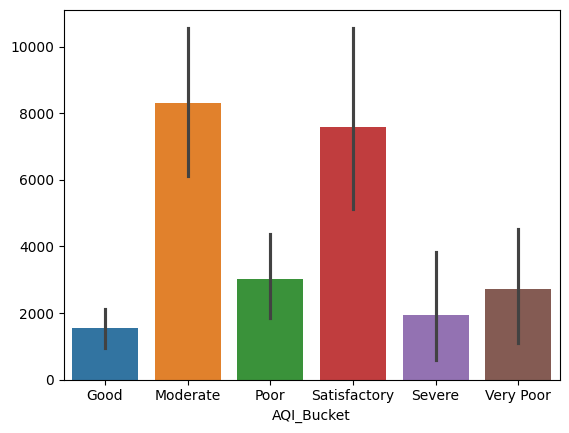

In [29]:
# distribution of City Vs AQI_Bucket uisng barplot
sns.barplot(data=df.groupby(["City","AQI_Bucket"]).size().unstack())

### From above observation 
* Each bar represents the count of occurrences for each AQI bucket category within a specific city. This visualization helps in understanding how air quality varies across different cities and the prevalence of different AQI bucket categories within each city.

### SO2 VS AQI_Bucket
Question: What is the disrtibution of SO2 and target variable AQI_Bucket?<br>
Approach: Visualizing the distribution plot of SO2 and AQI_Bucket using boxplot().<br>
-- sns.boxplot() compares the distribution of a numerical variabel with different categories.<br>


<Axes: xlabel='AQI_Bucket', ylabel='SO2'>

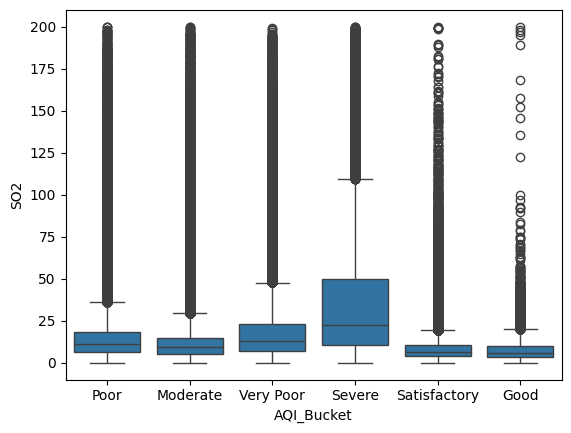

In [30]:
# visualizing SO2 vs AQI_Bucket usnig boxplot
sns.boxplot(x="AQI_Bucket", y="SO2", data=df)

### From above observation
* Variation, outlier and overall spread of SO2 with AQI_Bucket has been visualized.
* Satisfactory and Good has been seen outliers in this dataset.

### O3 VS AQI_Bucket
Question: What is the disrtibution of O3 and target variable AQI_Bucket?<br>
Approach: Visualizing the distribution plot of O3 and AQI_Bucket using boxplot().<br>
-- sns.boxplot() compares the distribution of a numerical variabel with different categories.<br>


<Axes: xlabel='AQI_Bucket', ylabel='O3'>

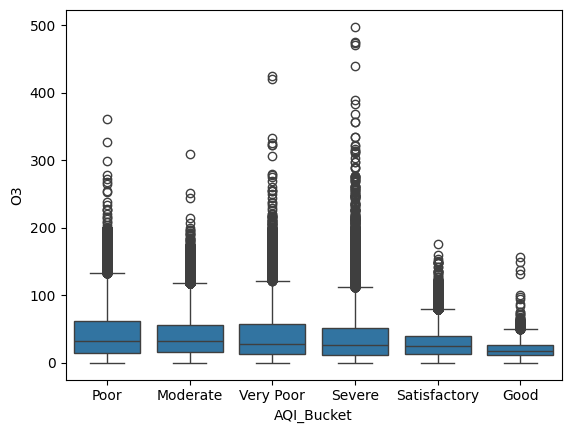

In [31]:
# visualizing O3 vs AQI_Bucket usnig boxplot
sns.boxplot(x="AQI_Bucket", y="O3", data=df)

### From above observation
* Variation, outlier and overall spread of O3 with AQI_Bucket has been visualized.
* In all class in AQI_Bucket has been seen outliers in this dataset.

### Distribution of data with target variable "AQI"

### PM2.5 VS AQI
Question: What is the distribution of PM2.5 VS AQI?<br>
Approach: Visualizing the distribution of PM2.5 VS AQI using scatterplot().<br>
-- sns.scatterplot() visualize the distribution of data of give variables. <br>

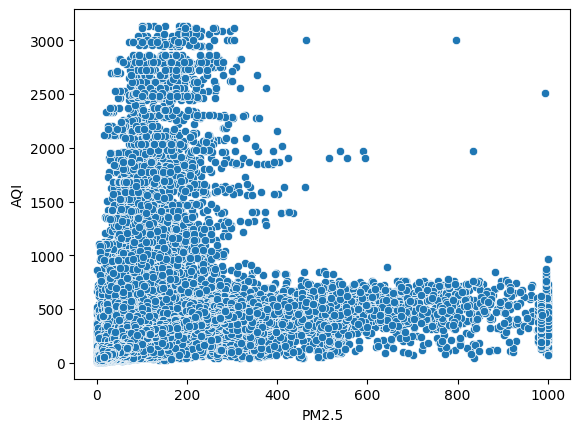

In [32]:
## visualizing distirbution of PM2.5 vs AQI
sns.scatterplot(x="PM2.5",y="AQI",data=df)
plt.show()

### From above observation
* When PM2.5 increase the AQI has decreases
* AQI has high value when PM2.5 value is between 0 to 250

### NH3 VS AQI
Question: What is the distribution of NH3 VS AQI?<br>
Approach: Visualizing the distribution of NH3 VS AQI using scatterplot().<br>
-- sns.scatterplot() visualize the distribution of data of give variables. <br>

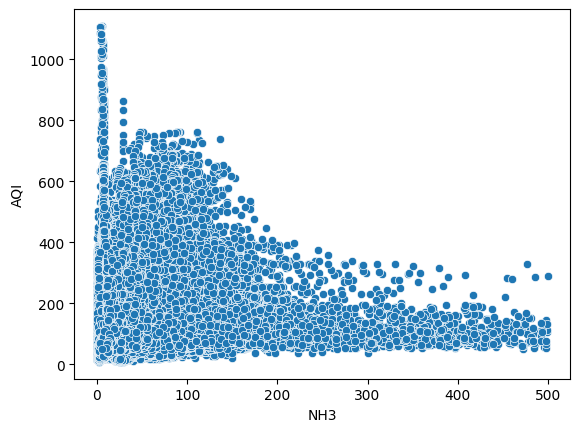

In [33]:
## visualizing distirbution of PM2.5 vs AQI
sns.scatterplot(x="NH3",y="AQI",data=df)
plt.show()

### From above observation
* When NH3 increase the AQI has also decreases
* AQI has high value when NH3 valus is between 0 to 150

# Creating an interactive plot for the each features

In [34]:
numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
categorical_features= ['City']

In [35]:
# visualizing numerical features vs AQI usnig scatterplot
@interact(predictor=numerical_features)
def interactive_bivariate_barplot(predictor):
    sns.scatterplot(x=predictor,y="AQI", data=df,color="purple")

interactive(children=(Dropdown(description='predictor', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', '…

# Here is the all numerical features scatter distribution plot with target variable AQI

In [36]:
# visualizing numerical features vs AQI_Bucket usnig boxplot
@interact(predictor=numerical_features)
def interactive_bivariate_barplot(predictor):
    sns.boxplot(x=predictor,y="AQI_Bucket", data=df,color="purple")

interactive(children=(Dropdown(description='predictor', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', '…

# Here is the all numerical features box distribution plot with target variable AQI_Bucket

# Visualizing all the numerical Columns only 
Question: What is the distribution of all the numerrical columns only?<br>
Approach: Visualizing the distribution all the numerical columns using pairplot().<br>
-- pairplot() visualize the pairwise relationship in a dataset.<br>

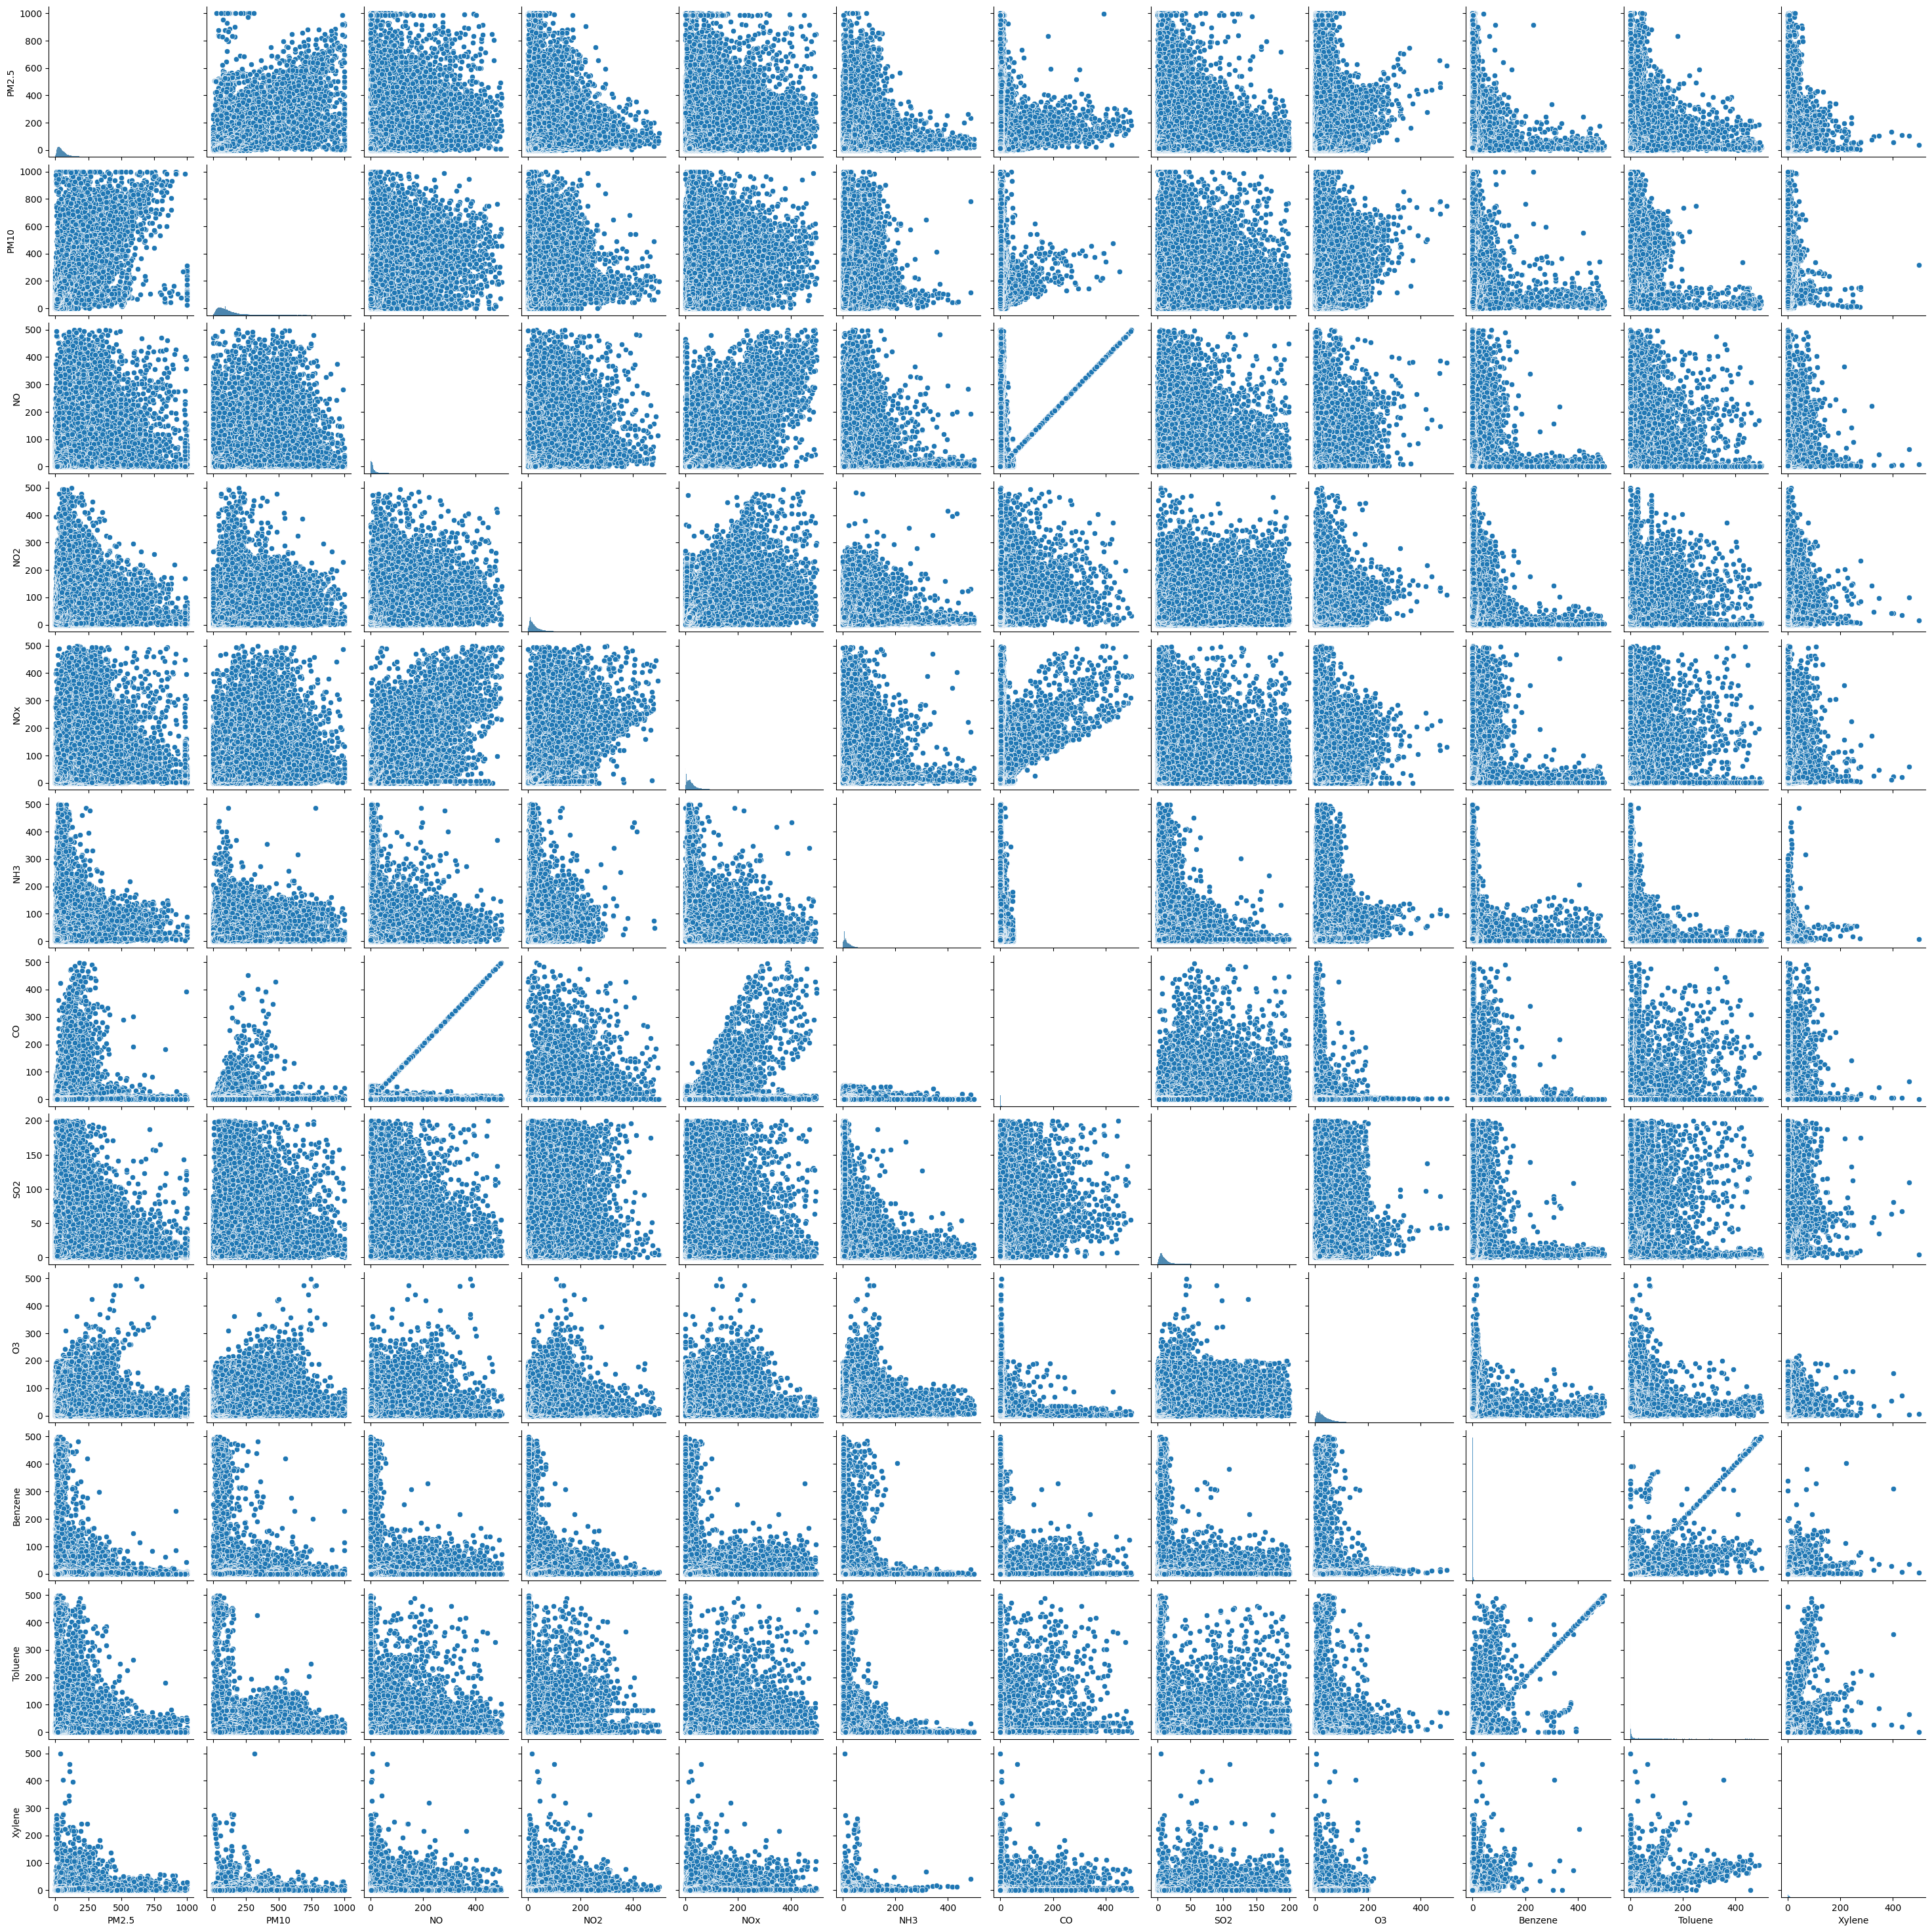

In [38]:
# Visualizing all the numerical Columns
sns.pairplot(data=df[numerical_features])